# Exploración de datos

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("data_info.csv")

In [39]:
df.dataset.unique()

array(['acm', 'hainsworth', 'gtzan', 'fma'], dtype=object)

In [40]:
# nos quedamos con los dataset completos
df = df[df.dataset != 'acm']

In [42]:
df.describe()

,Unnamed: 0,tempo
count,9211.000000,2516.000000
mean,3521.018022,109.924346
std,2467.468721,33.417315
min,0.000000,19.659000
25%,1080.500000,87.062750
50%,3383.000000,105.224000
75%,5685.500000,128.990750
max,7988.000000,250.059000


In [51]:
df["has_genre"] = ~df.genre.isnull()
df["has_tempo"] = ~df.tempo.isnull()
df["count"] = 1

In [56]:
df[["dataset","has_genre","has_tempo","count"]].groupby(["dataset","has_genre","has_tempo"]).sum()

count
dataset    has_genre has_tempo       
fma        True      False       6695
                     True        1294
gtzan      True      True        1000
hainsworth True      True         222

In [57]:
df = df[df.has_genre & df.has_tempo]

In [59]:
df[["dataset","has_genre","has_tempo","count"]].groupby(["dataset","has_genre","has_tempo"]).sum()

,,,count
dataset,has_genre,has_tempo,
fma,True,True,1294
gtzan,True,True,1000
hainsworth,True,True,222


In [73]:
df_genres = df[["dataset","genre","count"]].groupby(["dataset","genre"]).sum().reset_index()

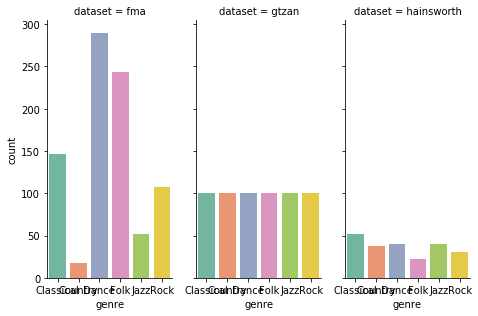

In [105]:
g = sns.FacetGrid(df_genres, col="dataset", height=4.5, aspect=0.5)
g.map(sns.barplot, "genre", "count",palette="Set2");

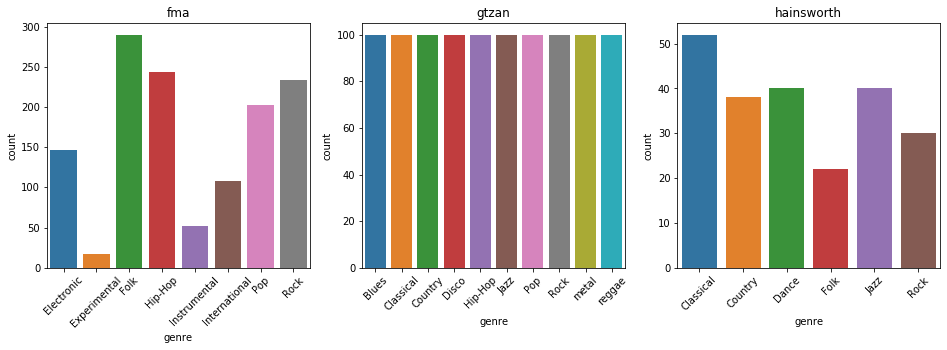

In [118]:
plt.figure(figsize=(16,4.5))

for i,dataset in enumerate(df_genres.dataset.unique()):
    df1 = df_genres[df_genres.dataset==dataset]
    chart = plt.subplot(1,3,i+1)
    plt.title(dataset)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    sns.barplot("genre", "count",data=df1)

In [95]:
df_tempos = df[["dataset","tempo"]]

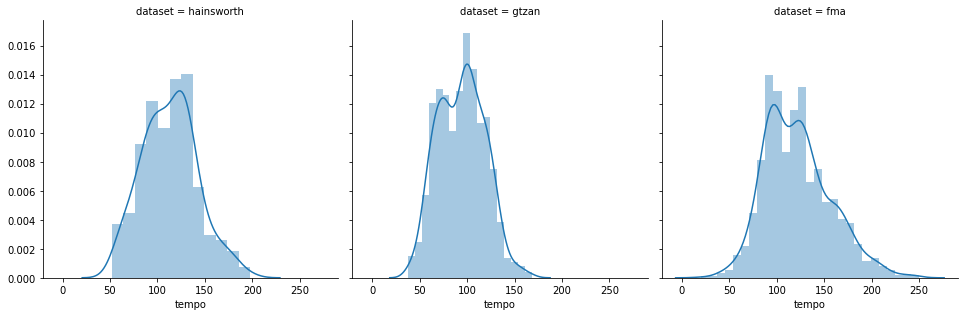

In [99]:
g = sns.FacetGrid(df_tempos, col="dataset", height=4.5, aspect=1)
g.map(sns.distplot, "tempo");

In [103]:
print(df_genres.genre.unique().tolist())

['Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Pop', 'Rock', 'Blues', 'Classical', 'Country', 'Disco', 'Jazz', 'metal', 'reggae', 'Dance']
